In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
car_data = pd.read_csv('car data.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

<Figure size 10000x10000 with 0 Axes>

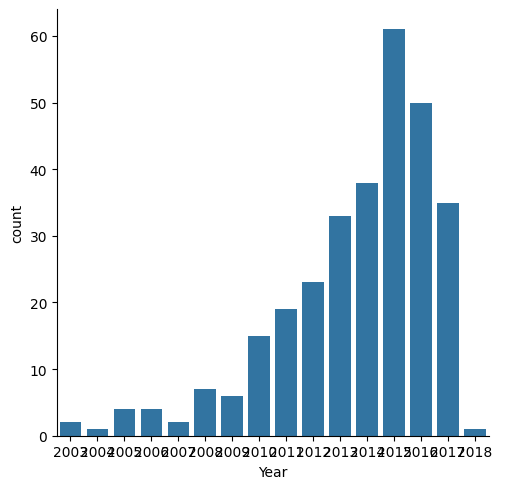

In [6]:
plot = plt.figure(figsize=(100,100))
sns.catplot(x='Year', data=car_data, kind='count')

In [7]:
car_data['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2007     2
2003     2
2018     1
2004     1
Name: count, dtype: int64

In [8]:
car_data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [9]:
car_data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [10]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [12]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
mappings = {
    'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
    'Transmission': {'Manual': 0, 'Automatic': 1},
    'Seller_Type': {'Dealer': 0, 'Individual': 1}
}

In [14]:
import joblib
joblib.dump(mappings, 'mappings.pkl')

['mappings.pkl']

In [15]:
car_data.replace(mappings, inplace=True)

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_30996\4032934950.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace(mappings, inplace=True)


In [16]:
X = car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [17]:
y = car_data['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

model Training

Linear regression

In [19]:
lin_reg = LinearRegression()

In [20]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred_lin = lin_reg.predict(X_train)

In [22]:
training_error = mean_squared_error(y_pred_lin, y_train)

In [23]:
print("The Mean Squared Error for the training set is:", training_error)

The Mean Squared Error for the training set is: 3.2590308233090943


Text(0, 0.5, 'predicted')

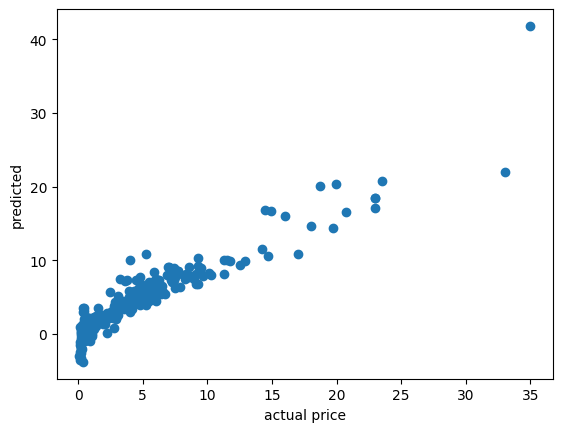

In [24]:
#visualise
plt.scatter(y_train, y_pred_lin)
plt.xlabel("actual price")
plt.ylabel("predicted")

In [25]:
y_pred_test_lin = lin_reg.predict(X_test)

In [26]:
test_error = mean_squared_error(y_pred_test_lin, y_test)

In [27]:
print("The Mean Squared Error for the training set is:", training_error)

The Mean Squared Error for the training set is: 3.2590308233090943


Text(0, 0.5, 'predicted')

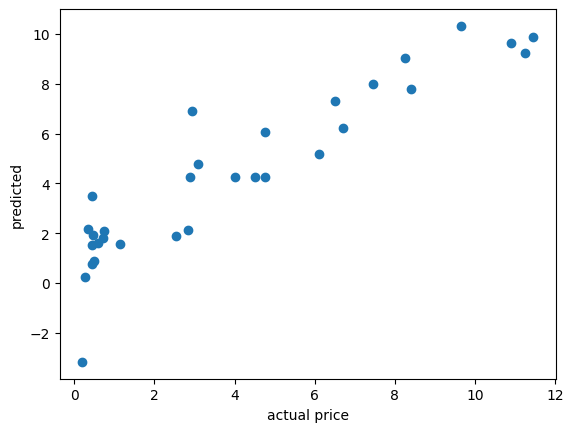

In [28]:
plt.scatter(y_test,y_pred_test_lin)
plt.xlabel("actual price")
plt.ylabel("predicted")

In [29]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_train)
training_error_knn = mean_squared_error(y_pred_knn, y_train)
print("The Mean Squared Error for the training set using KNN is:", training_error_knn)


The Mean Squared Error for the training set using KNN is: 18.52740198518518


In [30]:
y_pred_test_lin = knn_reg.predict(X_test)
test_error_knn = mean_squared_error(y_pred_test_lin, y_test)    
print("The Mean Squared Error for the test set using KNN is:", test_error_knn)

The Mean Squared Error for the test set using KNN is: 17.84756696774194


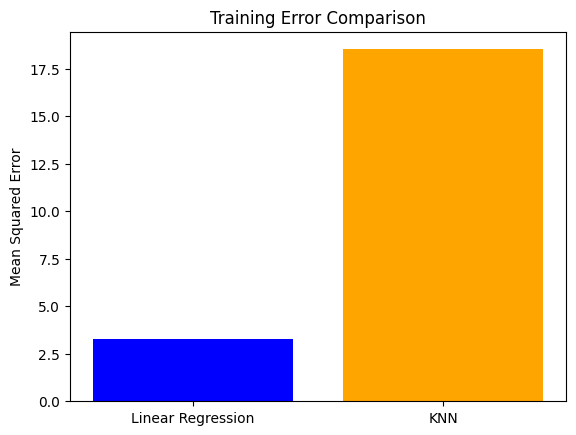

In [31]:
plt.bar(['Linear Regression', 'KNN'], [training_error, training_error_knn], color=['blue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Training Error Comparison')
plt.show()

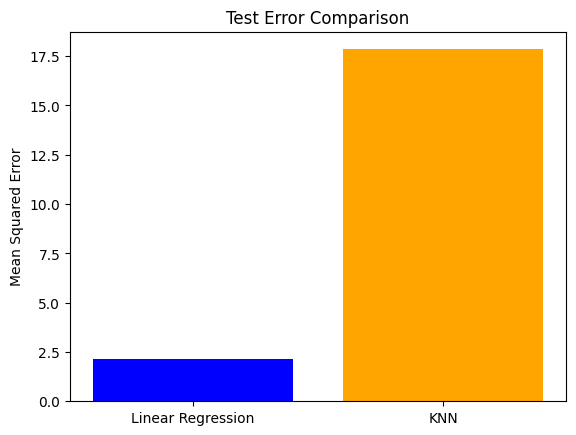

In [32]:
plt.bar(['Linear Regression', 'KNN'], [test_error, test_error_knn], color=['blue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Test Error Comparison')
plt.show()

In [33]:
joblib.dump(lin_reg, 'linear_regression_model.pkl')
joblib.dump(knn_reg, 'knn_regression_model.pkl')

['knn_regression_model.pkl']